<a href="https://colab.research.google.com/github/Toms201/ISYS2001-Assignment2/blob/main/ISYS2001_Assignment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISYS2001 ENRON EMAIL ANALYSIS ASSIGNMENT

---


### Assesment Two - Notebooks as Business Reports
### Tom Sargent 20594567

NOTE: Please run the notebook scripts in order as the report is read to ensure correct data filtering and graph generation






# Introduction

# Analysis

Within the report, we begin by analaysing the raw database of Enron reklated communications over the given data period so that we are able to determine key discussion factors.

To analyse the Enron dataset we must first download the given hosted dataset into the Notebook Instance

In [1]:
#Run the !wget function to download the database from the hosted platform. Save the database as enron.db in the colab instance machines files. 
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-11 05:27:51--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-11 05:27:52--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  42.7MB/s    in 23s     

2022-05-11 05:28:16 (34.7 MB/s) - ‘enron.db’ saved [853819392/853819392]



There are multiple ways that the datset can be analyses - By using SQL qurieies within python to filter and sort data, or by using the Pandas module for data analsyis. In this report I have chosen to include both.

We begin by importing SQLite 3 for SQL analysis within Python. Following this I will also import Pandas (with an alias pd) and NumPy for calculations.

In [2]:
#Import SQL Lite 3
import sqlite3

#connect sqlite to database that has been created Superheroes.db
conn = sqlite3.connect("enron.db")

#Create a cursor (like a row/row scanner)
cur = conn.cursor()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

To test that the import of the data was correct, and that the import of the sqlite3 module was sucessfull, I ran the following cell to check the avaliable tables.

In [4]:
# Using SQL display the Name of a Table within the database
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

## Analysing Email Traffic By Address

To begin, I thought it would be ideal to identify the data that would be required to find:

> Who are the top 10 emailers of the organisation.

For this we need to locate
1. The table that contains the record of all messages sent/recivied.
2. The Emails that messages are sent from/recieve messages.
3. A count of the occurances of email adresses by entry.

For this I decided to use Pandas to load the data into a dataframe

In [5]:
# Select all data from the table 'messages' using SQL
sql='''
SELECT * from message;
'''
# Load the data into a DataFrame names dfmessages
dfmessages = pd.read_sql_query(sql, conn)
dfmessages

#Count 10 times (for top 10)
n = 10

#In the dataframe dfmessages find the top count of values in the sender column and complete 'n' times
dfmessages['sender'].value_counts().index.tolist()[:n]

['jeff.dasovich@enron.com',
 'j.kaminski@enron.com',
 'kay.mann@enron.com',
 'sara.shackleton@enron.com',
 'tana.jones@enron.com',
 'chris.germany@enron.com',
 'no.address@enron.com',
 'enron.announcements@enron.com',
 'matthew.lenhart@enron.com',
 'debra.perlingiere@enron.com']

Now we can confirm that the above emails are the top 10 emailers of the organisation, however, the data does not display how many emails each send.

In [7]:
# in the datataframe defined, within the column 'sender' count the top 10 occurances
dfmessages['sender'].value_counts()[:10]

jeff.dasovich@enron.com          6273
j.kaminski@enron.com             5838
kay.mann@enron.com               5100
sara.shackleton@enron.com        4797
tana.jones@enron.com             4437
chris.germany@enron.com          3686
no.address@enron.com             3511
enron.announcements@enron.com    2838
matthew.lenhart@enron.com        2784
debra.perlingiere@enron.com      2549
Name: sender, dtype: int64

Now that a list exists, and the corect data can be confirmed, we need to create a plot that can be included in the discussion. Using the 'barh' style of graph we can easially see the y axis labels horizontially, rather than having to rotate x axis emails.

Text(0.5, 1.0, 'Top 10 Emailers At Enron')

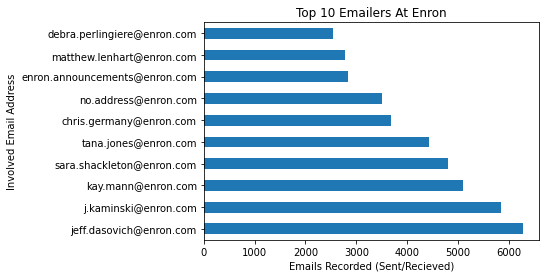

In [24]:
# As a bar histogram, plot the top 10 occurances in the sender column of the dfmessages dataframe
plot1 = dfmessages['sender'].value_counts()[:10].plot(kind='barh')
# Change x-axis label to "Emails Recorded (Sent/Recieved)"
plt.xlabel("Emails Recorded (Sent/Recieved)")
# Change y-axis label to "Involved Email Address"
plt.ylabel("Involved Email Address")
# Change the Plot title to "Top 10 Emailers At Enron"
plt.title("Top 10 Emailers At Enron")


## Analysing Email traffic By Date
Following analysing the email adresses which sent and recieved the most emails from Enron, we must now investigate the dates which had the most email traffic, sent or recived.

# Discussion

# Conclusion

# References